# Import Libraries and Datasets


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)




In [2]:
tweets_df = pd.read_csv('twitter_data2.csv', encoding='latin-1')

In [3]:
tweets_df

,Tweet
0,RT @dayo_milly: You always can confined in me ...
1,RT @akoma879fm: Substitution time. Tired and e...
2,@BBCAfrica @tv3_ghana \n@thegbcghana\n@JoyNews...
3,https://t.co/7aX4fLogjH \nWatch #ghana &amp; ...
4,"RT @MutomboDaPoet: Nana Yaw Barimah, Prez of D..."
...,...
2205,ðððð ðð: October 2022 ðð...
2206,@MichaelNiiMart1 @woexlam_at @faith_flows @jul...
2207,RT @Nana_kesse1: Ghanaâs economy is basicall...
2208,RT @JoyNewsOnTV: The economy and organised lab...


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2210 non-null   object
dtypes: object(1)
memory usage: 17.4+ KB


In [5]:
tweets_df.describe()

,Tweet
count,2210
unique,2210
top,RT @dayo_milly: You always can confined in me ...
freq,1


In [6]:
tweets_df['Tweet']

0       RT @dayo_milly: You always can confined in me ...
1       RT @akoma879fm: Substitution time. Tired and e...
2       @BBCAfrica @tv3_ghana \n@thegbcghana\n@JoyNews...
3       https://t.co/7aX4fLogjH  \nWatch #ghana &amp; ...
4       RT @MutomboDaPoet: Nana Yaw Barimah, Prez of D...
                              ...                        
2205    ðððð ðð: October 2022 ðð...
2206    @MichaelNiiMart1 @woexlam_at @faith_flows @jul...
2207    RT @Nana_kesse1: Ghanaâs economy is basicall...
2208    RT @JoyNewsOnTV: The economy and organised lab...
2209    RT @GoGMIOfficial: #ongoing ECOP TRAINING PROG...
Name: Tweet, Length: 2210, dtype: object

In [7]:
# Drop The time and user columns
# tweets_df = tweets_df.drop(['Time'], axis = 1)

In [8]:
# tweets_df = tweets_df.drop(['User'], axis = 1)

In [9]:
# tweets_df

# Explore Dataset

<AxesSubplot:>

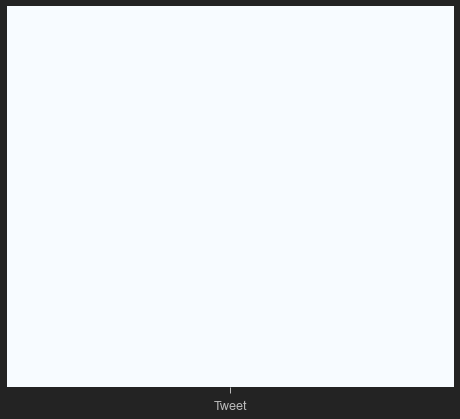

In [10]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [11]:
# sns.countplot(tweets_df['label'], label = 'Count')

In [12]:
tweets_df['length'] = tweets_df['Tweet'].apply(len)

In [13]:
tweets_df

,Tweet,length
0,RT @dayo_milly: You always can confined in me ...,144
1,RT @akoma879fm: Substitution time. Tired and e...,142
2,@BBCAfrica @tv3_ghana \n@thegbcghana\n@JoyNews...,255
3,https://t.co/7aX4fLogjH \nWatch #ghana &amp; ...,283
4,"RT @MutomboDaPoet: Nana Yaw Barimah, Prez of D...",99
...,...,...
2205,ðððð ðð: October 2022 ðð...,275
2206,@MichaelNiiMart1 @woexlam_at @faith_flows @jul...,255
2207,RT @Nana_kesse1: Ghanaâs economy is basicall...,144
2208,RT @JoyNewsOnTV: The economy and organised lab...,142


<AxesSubplot:ylabel='Frequency'>

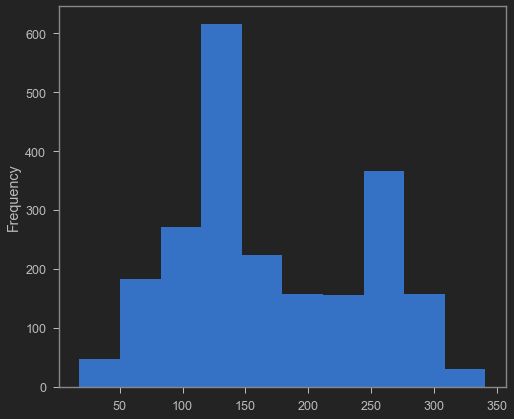

In [14]:
tweets_df['length'].plot(bins=10, kind='hist')

In [15]:
tweets_df.describe()

,length
count,2210.000000
mean,170.761538
std,71.522818
min,18.000000
25%,121.000000
50%,146.000000
75%,245.000000
max,341.000000


In [16]:
tweets_df[tweets_df['length'] == 18]['Tweet'].iloc[0]

'@tv3_ghana Economy'

In [17]:
tweets_df[tweets_df['length'] == 171]['Tweet'].iloc[0]

'@Kanthan2030 @FirstSquawk These private enterprises have been killing Africa.Especially,Ghana.Ghana has the worst economy and the the most incompetent President in Africa.'

In [18]:
tweets_df[tweets_df['length'] == 341]['Tweet'].iloc[0]

'ð\x9f\x87¬ð\x9f\x87\xadð\x9f\x87¬ð\x9f\x87\xadð\x9f\x87¬ð\x9f\x87\xadð\x9f\x87¬ð\x9f\x87\xadð\x9f\x87¬ð\x9f\x87\xadð\x9f\x87¬ð\x9f\x87\xad\nIs the Nation Ghana expecting youths to contribute to the development of the Country by treating them as slaves in this century &amp; economy? \nAs a national service personnel, Can we survive a month with Gh559.0 #IncreaseTheNSSallawa\n@NAkufoAddo @yoadutwum @afiaoware https://t.co/uy1LOhQJWH'

# CREATE A PATTERN FOR EMOJIS (EMOTICONS, SYMBOLS, PICTOGRAPHS, TRANSPORT & MAP SYMBOLS AND iOS FLAGS)

In [19]:
import re

emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F" 
         u"\U0001F300-\U0001F5FF"  
         u"\U0001F680-\U0001F6FF"  
         u"\U0001F1E0-\U0001F1FF"  
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
                           "]+")

# CREATE A PIPELINE TO REMOVE HASHTAGS, RETWEETS, @MENTIONS AND EMOJIS

In [20]:
# import re

def tweet_cleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+", "", tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9]+", "", cleanTweet)
    cleanTweet = re.sub(r"https?:\/\/\S+", "", cleanTweet)
    cleanTweet = re.sub(r"RT[\s]+", "", cleanTweet)
    cleanTweet = emoji_pattern.sub(r'', cleanTweet)
   
    return cleanTweet.lower()

In [21]:
tweets_df['newTweet'] = tweets_df['Tweet'].apply(tweet_cleaning)
tweets_df.head()

,Tweet,length,newTweet
0,RT @dayo_milly: You always can confined in me ...,144,_milly: you always can confined in me for your...
1,RT @akoma879fm: Substitution time. Tired and e...,142,: substitution time. tired and exhausted polic...
2,@BBCAfrica @tv3_ghana \n@thegbcghana\n@JoyNews...,255,_ghana \n\n \n_ghana\n \n \n \n \n \n \n \n \...
3,https://t.co/7aX4fLogjH \nWatch #ghana &amp; ...,283,\nwatch &amp; 's finance minister (deputy) ...
4,"RT @MutomboDaPoet: Nana Yaw Barimah, Prez of D...",99,": nana yaw barimah, prez of drivers for change..."


# CREATE A PIPELINE TO REMOVE PUNCTUATIONS AND STOPWORDS 

In [22]:
import string
string.punctuation

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join( Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return  Test_punc_removed_join_clean

In [25]:
tweets_df['data'] = tweets_df['newTweet'].apply(message_cleaning)
# data

tweets_df['cleanTweet'] = [' '.join(map(str, item)) for item in tweets_df['data']]
tweets_df.head()

,Tweet,length,newTweet,data,cleanTweet
0,RT @dayo_milly: You always can confined in me ...,144,_milly: you always can confined in me for your...,"[milly, always, confined, luxury, quality, aff...",milly always confined luxury quality affordabl...
1,RT @akoma879fm: Substitution time. Tired and e...,142,: substitution time. tired and exhausted polic...,"[substitution, time, tired, exhausted, police,...",substitution time tired exhausted police offic...
2,@BBCAfrica @tv3_ghana \n@thegbcghana\n@JoyNews...,255,_ghana \n\n \n_ghana\n \n \n \n \n \n \n \n \...,"[ghana, ghana, ghana]",ghana ghana ghana
3,https://t.co/7aX4fLogjH \nWatch #ghana &amp; ...,283,\nwatch &amp; 's finance minister (deputy) ...,"[watch, amp, finance, minister, deputy, take, ...",watch amp finance minister deputy take bribe s...
4,"RT @MutomboDaPoet: Nana Yaw Barimah, Prez of D...",99,": nana yaw barimah, prez of drivers for change...","[nana, yaw, barimah, prez, drivers, change]",nana yaw barimah prez drivers change


In [26]:
print(tweets_df['newTweet'][5])

_ceyram: a good day to remind ourselves of what rawlings said.  


In [27]:
print(tweets_df['cleanTweet'][5])

ceyram good day remind rawlings said


In [28]:
# from sklearn.feature_extraction.text import CountVectorizer
# # Define the cleaning pipeline
# vectorizer = CountVectorizer(analyzer = message_cleaning)
# tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['Tweet']).toarray


In [29]:
# tweets_countvectorizer.shape

# PLOT THE WORDCLOUD

In [30]:
sentences = tweets_df['data'].tolist()
# sentences = tweets_df_clean.tolist()

In [31]:
sentences

[['milly',
  'always',
  'confined',
  'luxury',
  'quality',
  'affordable',
  'wearsbagpackslideampsneakersoshaaamo',
  'â\x80¦'],
 ['substitution',
  'time',
  'tired',
  'exhausted',
  'police',
  'officers',
  'change',
  'shift',
  'new',
  'officers',
  'take',
  'field',
  'â\x80¦'],
 ['ghana', 'ghana', 'ghana'],
 ['watch',
  'amp',
  'finance',
  'minister',
  'deputy',
  'take',
  'bribe',
  'shopping',
  'ghana',
  'ghana',
  'ghana'],
 ['nana', 'yaw', 'barimah', 'prez', 'drivers', 'change'],
 ['ceyram', 'good', 'day', 'remind', 'rawlings', 'said'],
 ['ghana'],
 ['aww',
  'bad',
  'money',
  'oo',
  'ð\x9f\x99\x86â\x80\x8dâ\x99\x82ï¸\x8f',
  'sarkodie',
  'shattawale',
  'bulldog',
  'stonebwoy',
  'ghana',
  'accra',
  'â\x80¦'],
 ['aww',
  'bad',
  'money',
  'oo',
  'ð\x9f\x99\x86â\x80\x8dâ\x99\x82ï¸\x8f',
  'sarkodie',
  'shattawale',
  'bulldog',
  'stonebwoy',
  'ghana',
  'accra',
  'bawumia',
  'sika',
  'mp3',
  'mahama',
  'asantehene',
  'captain',
  'smart',
  's

In [32]:
len(sentences)

2210

In [33]:
sentences_as_one_string = " ".join(' '.join(l) for l in sentences)

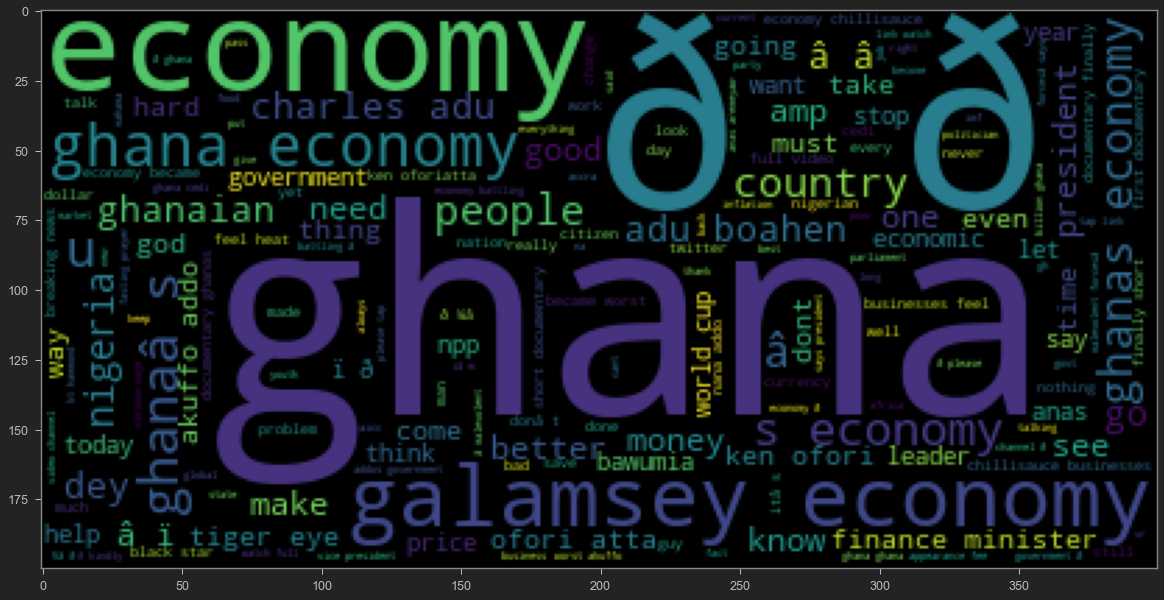

In [34]:
# !pip install wordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# CREATE A PIPELINE TO CALCULATE POLARITY, SUBJECTIVITY AND SEGMENTATION

In [35]:
from textblob import TextBlob

def calPolarity(cleanTweet):
    return TextBlob(cleanTweet).sentiment.polarity

def calSubjectivity(cleanTweet):
    return TextBlob(cleanTweet).sentiment.subjectivity

def segmentation(cleanTweet):
    if cleanTweet > 0:
        return "positive"
    if cleanTweet == 0:
        return "neutral"
    else: 
        return "negative"

In [36]:
tweets_df['Polarity'] = tweets_df['cleanTweet'].apply(calPolarity)
tweets_df['Subjectivity'] = tweets_df['cleanTweet'].apply(calSubjectivity)
tweets_df['segmentation'] = tweets_df['Polarity'].apply(segmentation)
tweets_df.head()

,Tweet,length,newTweet,data,cleanTweet,Polarity,Subjectivity,segmentation
0,RT @dayo_milly: You always can confined in me ...,144,_milly: you always can confined in me for your...,"[milly, always, confined, luxury, quality, aff...",milly always confined luxury quality affordabl...,0.000000,0.000000,neutral
1,RT @akoma879fm: Substitution time. Tired and e...,142,: substitution time. tired and exhausted polic...,"[substitution, time, tired, exhausted, police,...",substitution time tired exhausted police offic...,-0.221212,0.618182,negative
2,@BBCAfrica @tv3_ghana \n@thegbcghana\n@JoyNews...,255,_ghana \n\n \n_ghana\n \n \n \n \n \n \n \n \...,"[ghana, ghana, ghana]",ghana ghana ghana,0.000000,0.000000,neutral
3,https://t.co/7aX4fLogjH \nWatch #ghana &amp; ...,283,\nwatch &amp; 's finance minister (deputy) ...,"[watch, amp, finance, minister, deputy, take, ...",watch amp finance minister deputy take bribe s...,0.000000,0.000000,neutral
4,"RT @MutomboDaPoet: Nana Yaw Barimah, Prez of D...",99,": nana yaw barimah, prez of drivers for change...","[nana, yaw, barimah, prez, drivers, change]",nana yaw barimah prez drivers change,0.000000,0.000000,neutral


In [37]:
tweets_df.sort_values(by=['Polarity'], ascending= False).head(3)

,Tweet,length,newTweet,data,cleanTweet,Polarity,Subjectivity,segmentation
2127,RT @Zahrahmusa: I donât Believe it!!!\nSame ...,118,: i donât believe it!!!\nsame ghana thatâs...,"[donât, believe, ghana, thatâs, best, econ...",donât believe ghana thatâs best economy we...,1.0,0.30,positive
1742,RT @BCMarketGh: Ghana has genius people who th...,142,: ghana has genius people who think and make w...,"[ghana, genius, people, think, make, wonderful...",ghana genius people think make wonderful plans...,1.0,0.65,positive
2128,I donât Believe it!!!\nSame Ghana thatâs t...,126,i donât believe it!!!\nsame ghana thatâs t...,"[donât, believe, ghana, thatâs, best, econ...",donât believe ghana thatâs best economy we...,1.0,0.30,positive


In [38]:
tweets_df.sort_values(by=['Polarity'], ascending= True).head(3)

,Tweet,length,newTweet,data,cleanTweet,Polarity,Subjectivity,segmentation
361,Every Ghanaian under the economy of @NAkufoAdd...,249,"every ghanaian under the economy of , the wor...","[every, ghanaian, economy, worst, president, e...",every ghanaian economy worst president ever jo...,-1.0,1.0,negative
138,"Today is November 16th, 2022 and Nana Akuffo A...",241,"today is november 16th, 2022 and nana akuffo a...","[today, november, 16th, 2022, nana, akuffo, ad...",today november 16th 2022 nana akuffo addo wors...,-1.0,1.0,negative
841,RT @aanuadeoye: In @FT - Cedi is worldâs wor...,144,: in - cedi is worldâs worst currency again...,"[cedi, worldâs, worst, currency, dollar, yea...",cedi worldâs worst currency dollar year 40 i...,-1.0,1.0,negative


In [39]:
tweets_df[tweets_df.Polarity==0].head(3)

,Tweet,length,newTweet,data,cleanTweet,Polarity,Subjectivity,segmentation
0,RT @dayo_milly: You always can confined in me ...,144,_milly: you always can confined in me for your...,"[milly, always, confined, luxury, quality, aff...",milly always confined luxury quality affordabl...,0.0,0.0,neutral
2,@BBCAfrica @tv3_ghana \n@thegbcghana\n@JoyNews...,255,_ghana \n\n \n_ghana\n \n \n \n \n \n \n \n \...,"[ghana, ghana, ghana]",ghana ghana ghana,0.0,0.0,neutral
3,https://t.co/7aX4fLogjH \nWatch #ghana &amp; ...,283,\nwatch &amp; 's finance minister (deputy) ...,"[watch, amp, finance, minister, deputy, take, ...",watch amp finance minister deputy take bribe s...,0.0,0.0,neutral


<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

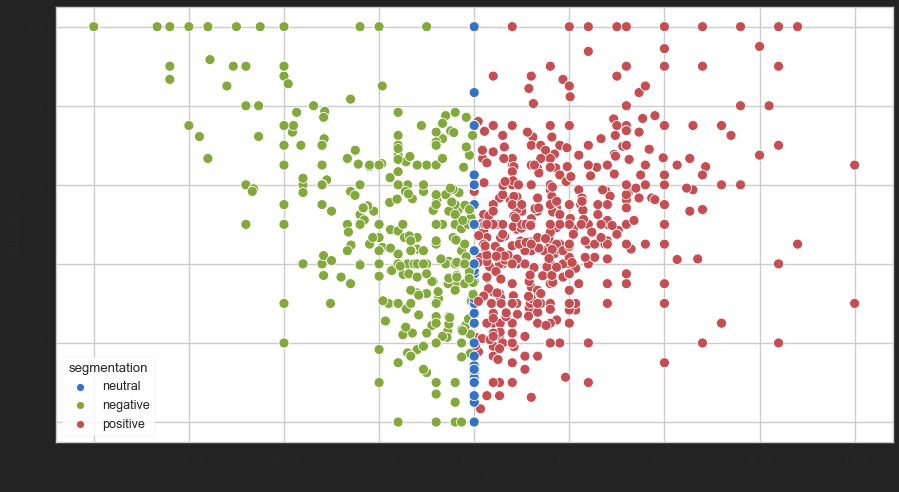

In [40]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.scatterplot(data=tweets_df, x='Polarity', y='Subjectivity', s=100, hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

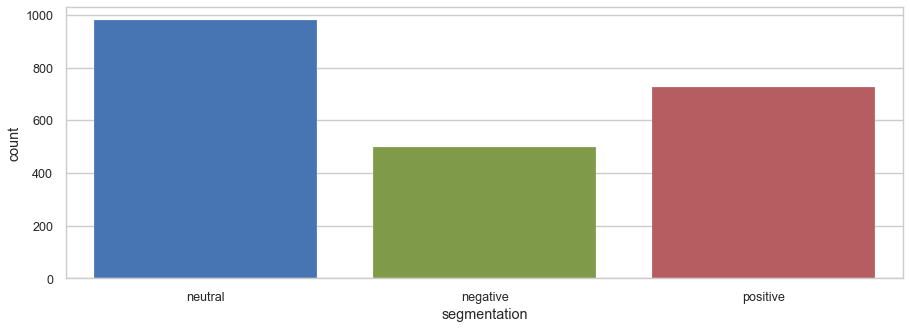

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(data=tweets_df, x='segmentation')